In [1]:
pwd

'/home/weizhao/shared_folder/ds_self_learning/data_science/Metis/metisgh/prework/ThinkStats2_my_work'

In [2]:
cd ../ThinkStats2-master/code

/home/weizhao/shared_folder/ds_self_learning/data_science/Metis/metisgh/prework/ThinkStats2-master/code


In [108]:
import numpy as np
import pandas as pd
import scipy as sp
import nsfg
import matplotlib.pyplot as plt
import first
import thinkstats2
import thinkplot

In [23]:
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
# agepreg = live.agepreg
# totalwgt = live.totalwgt_lb

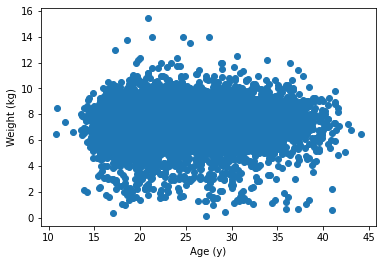

In [60]:
plt.scatter(agepreg, totalwgt)
thinkplot.Config(xlabel='Age (y)',
                 ylabel='Weight (kg)',
                 legend=False)

In [142]:
bins = np.arange(min(agepreg), max(agepreg), 5)
# n_group = 7
# bins = np.linspace(min(agepreg), max(agepreg), n_group)
indices = np.digitize(agepreg, bins)
groups = live.groupby(indices)
bins
# array([10.83      , 16.37166667, 21.91333333, 27.455     , 32.99666667,
#        38.53833333, 44.08      ])

array([10.83, 15.83, 20.83, 25.83, 30.83, 35.83, 40.83])

In [143]:
for i, group in groups:
    print(i, len(group))

1 153
2 2276
3 2871
4 2233
5 1181
6 305
7 19


In [144]:
mean_age = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

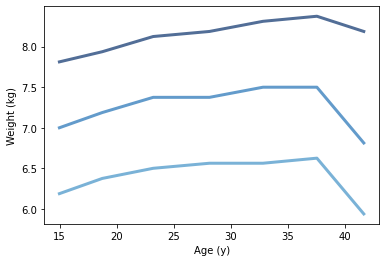

In [145]:
for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_age, weight_percentiles, label=label)
    
thinkplot.Config(xlabel='Age (y)',
                 ylabel='Weight (kg)',
                 legend=False)

In [153]:
corrcoef_pearson = []
p_val_pearson = []
for percent in np.arange(5, 95, 5):
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    t = (sp.stats.pearsonr(mean_age, weight_percentiles))
    corrcoef_pearson.append(t[0])
    p_val_pearson.append(t[1])
print('r = ', corrcoef_pearson)
print('p = ', p_val_pearson)
# when the data is divided into more groups, 
# pearson correlation is likely to be affected by outliers 
# (negative correlation; but generally weak positive corr ), 
# but spearman correlation is not. 

r =  [-0.5675763492688145, -0.544856082759164, -0.3318790249429516, -0.41127098085913866, -0.05693763231530202, -0.028315224351983137, 0.1376920319182521, 0.11525214133045059, 0.22696748469271744, 0.05606765067898983, 0.22389963253570394, 0.2085358103576768, 0.12458174883248502, -0.10997090821141575, 0.8479093925722689, 0.9120585994829992, 0.9128055807434678, 0.8094541260242167]
p =  [0.18383409539462783, 0.20597023711399914, 0.4670934053687416, 0.35932250756004885, 0.9034962783144069, 0.9519498497392626, 0.7684563058167787, 0.8056387636459229, 0.6245353915975121, 0.9049661377799424, 0.6293516018949628, 0.653625833662741, 0.790140904234103, 0.8144344287847255, 0.015935845808519384, 0.004199175678520547, 0.004112268472137313, 0.027391584178462]


In [151]:
corrcoef_spearman = []
p_val_spearman = []
for percent in np.arange(5, 95, 5):
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    t = sp.stats.spearmanr(mean_age, weight_percentiles)
    corrcoef_spearman.append(t[0])
    p_val_spearman.append(t[1])
print('r = ', corrcoef_spearman)
print('p = ', p_val_spearman)


r =  [-0.14285714285714288, -0.054554472558998104, 0.12613124477737828, 0.18531232916527532, 0.23424374030084535, 0.23424374030084535, 0.23424374030084535, 0.23424374030084535, 0.21821789023599242, 0.21821789023599242, 0.2909571869813232, 0.23424374030084535, 0.23424374030084535, 0.20191135200894691, 0.8468812149338255, 0.9274260335029679, 0.9910312089651149, 0.8894991799933215]
p =  [0.7599453002180929, 0.9075232086487942, 0.7875721594074739, 0.6907777961916857, 0.6131550369752419, 0.6131550369752419, 0.6131550369752419, 0.6131550369752419, 0.638298871640929, 0.638298871640929, 0.526695193239918, 0.6131550369752419, 0.6131550369752419, 0.6641688709265707, 0.016197127467871632, 0.002620044424320283, 1.4561252916129422e-05, 0.007339425561684951]


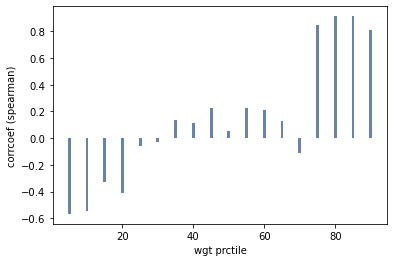

In [164]:
thinkplot.Bar( np.arange(5, 95, 5), corrcoef_pearson)
thinkplot.Config(xlabel='wgt prctile',
                 ylabel='corrcoef (spearman)',
                 legend=False)

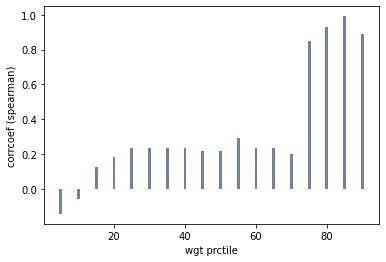

In [163]:
thinkplot.Bar( np.arange(5, 95, 5), corrcoef_spearman)
thinkplot.Config(xlabel='wgt prctile',
                 ylabel='corrcoef (spearman)',
                 legend=False)

In [ ]:
# for heavy babies, older mothers tend to give birth to heavy babies. 